# **NQSolver Starter Guide**

1. Click the run button on the "Materials" cell.
2. Also Run the "NQSolver" cell.
3. When the question pops up, enter your Named Graph url.
4. Get your results! 

# **Materials**

## Query variables

In [ ]:
####google code archive: g / tutorial: t/ modified from me: m/ created= c

##total_count

#1. total number of triples: g
tot_triples= """SELECT (COUNT(*) AS ?no) { ?s ?p ?o }"""

#2. total number of distinct classes: g/m
tot_classes= """SELECT (COUNT(distinct ?o) AS ?no)
WHERE { ?s rdf:type ?o }"""

#3. total number of distinct predicates: g/m
tot_p= """SELECT (COUNT(distinct ?p) AS ?no)
WHERE { ?s ?p ?o .}"""

#4. total number of distinct subject nodes: g
tot_s= """SELECT (COUNT(DISTINCT ?s ) AS ?no) { ?s ?p ?o }"""

#5. total number of distinct object nodes: g
tot_o= """SELECT (COUNT(DISTINCT ?o ) AS ?no) { ?s ?p ?o filter(!isLiteral(?o)) }"""

#6. total number of named graphs: t
tot_nq= """SELECT (COUNT(DISTINCT ?g)AS ?count)
WHERE {
  GRAPH ?g {?s ?p ?o}
}"""

## table

#1. table: class vs. total number of instances of the class: g

class_vs_num= """SELECT ?class (COUNT(?s) AS ?count ) { ?s a ?class } GROUP BY ?class ORDER BY ?count"""

#2. table: property vs. total number of triples using the property: g

prop_vs_num_tri= """SELECT ?p (COUNT(?s) AS ?count ) { ?s ?p ?o } GROUP BY ?p ORDER BY ?count"""

#3. table: property vs. total number of distinct subjects in triples using the property: g

prop_vs_num_sub= """SELECT ?p (COUNT(DISTINCT ?s ) AS ?count ) { ?s ?p ?o } GROUP BY ?p ORDER BY ?count"""

#4. table: property vs. total number of distinct objects in triples using the property: g

prop_vs_num_obj= """SELECT ?p (COUNT(DISTINCT ?o ) AS ?count ) { ?s ?p ?o } GROUP BY ?p ORDER BY ?count"""

#5. table: named graph vs. total number of triples of the class : c

nq_vs_num_tri= """SELECT ?g (COUNT(?s) AS ?count)
WHERE {
  GRAPH ?g {?s ?p ?o}
}
GROUP BY ?g
ORDER BY ?count"""

##full list: up to 100

full_triples= """SELECT * { ?s ?p ?o }
LIMIT 100"""

full_classes= """SELECT DISTINCT ?o
WHERE { ?s rdf:type ?o }"""

full_p= """SELECT DISTINCT ?p
WHERE { ?s ?p ?o .}"""

full_s= """SELECT DISTINCT ?s { ?s ?p ?o }
LIMIT 100"""

full_o= """SELECT DISTINCT ?o { ?s ?p ?o filter(!isLiteral(?o)) }
LIMIT 100"""

full_nq= """SELECT DISTINCT ?g
WHERE {
  GRAPH ?g {?s ?p ?o}
}"""

##list

query_total= [tot_triples, tot_classes, tot_p, tot_s, tot_o, tot_nq]
query_total_name= ['Total Triples','Total Classes','Total Predicates','Total Subjects','Total Objects', 'Total Named Graphs']

query_table= [class_vs_num, prop_vs_num_tri, prop_vs_num_sub, prop_vs_num_obj, nq_vs_num_tri]
query_table_name= ['Class vs Trip', 'Prop vs Trip', 'Prop vs Sub','Prop vs Obj', 'NQ vs Trip']

query_full= [full_classes, full_p, full_s, full_o, full_nq]
query_full_name= ['Full list Classes', 'Full list Predicates', 'Full list Subjects', 'Full list Objects', 'Full list Named Graphs']

## Functions

#### Rdflib install

In [ ]:
!pip install rdflib

#### Function to get total number of triples, classes, named graphs, subjects, predicates, and objects

In [ ]:
def result_total(data):
  """
  run queries that ask the total (e.g. triples, classes, named graphs, s, p, o)
  :param str data: github URL to the named graph data
  :rtype: dict
  :return: query result
  """
  import rdflib
  result_dict= dict()

  #empty graph
  g= rdflib.ConjunctiveGraph()
  #parse external github datafile
  result= g.parse(data, format= 'nquads')

  #querying: store result in dict
  for var, name in zip(query_total, query_total_name):
    query_results = g.query(var)
    for res in query_results:
      result= int(res[0])
      result_dict[name]= result

  return result_dict


#### Function to see the configuration of classes, properties, and named graphs.

In [ ]:
def result_table(data):
  """
  run queries that gives tables
  :param str data: github URL to the named graph data
  :rtype: dict
  :return: query result
  """
  import rdflib
  result_dict= dict()

  #empty graph
  g= rdflib.ConjunctiveGraph()
  #parse external github datafile
  result= g.parse(data, format= 'nquads')

  #querying: store result in dict
  for var, name in zip(query_table, query_table_name):
    query_results = g.query(var)
    column_dict= dict()
    for res in query_results:
      column1= str(res[0])
      column2= int(res[1])
      column_dict[column1]=column2 
    result_dict[name]= column_dict

  return result_dict

#### Function for getting full lists

In [ ]:
def result_full(data):
  """
  run queries that gives full list of classes, subjects, objects, predicates, named graphs, up to 100 results
  :param str data: github URL to the named graph data
  :rtype: dict
  :return: query result
  """
  import rdflib
  result_dict= dict()

  #empty graph
  g= rdflib.ConjunctiveGraph()
  #parse external github datafile
  result= g.parse(data, format= 'nquads')

  #querying: store result in dict
  for var, name in zip(query_full, query_full_name):
    query_results = g.query(var)
    result_list= []
    for res in query_results:
      result= str(res[0])
      result_list.append(result)
    result_dict[name]= result_list

  return result_dict

#### Function for visualization

In [ ]:
#barchart

def barchart_2(data):
  import matplotlib.pyplot as plt

  barcharta = result_total(data)

  barchart2 = barcharta
  del barchart2['Total Objects']
  del barchart2['Total Subjects']
  del barchart2['Total Triples']

  plt.bar(range(len(barchart2)), list(barchart2.values()), align='center', color=(0.2, 0.4, 0.6, 0.6))
  plt.xticks(range(len(barchart2)), list(barchart2.keys()), rotation=45)
  plt.tight_layout()
  plt.show()
  
def barchart_1(data):
  import matplotlib.pyplot as plt

  barchartb = result_total(data)

  barchart3 = barchartb
  del barchart3['Total Predicates']
  del barchart3['Total Classes']
  del barchart3['Total Named Graphs']
  plt.bar(range(len(barchart3)), list(barchart3.values()), align='center', color=(0.2, 0.4, 0.6, 0.6))
  plt.xticks(range(len(barchart3)), list(barchart3.keys()), rotation=45)
  plt.tight_layout()
  plt.show()

def barchart(data):
  import matplotlib.pyplot as plt

  barchart_1(data)
  barchart_2(data)

In [ ]:
#piechart

def piechart(data):
  import matplotlib.pyplot as plt
  from collections import Counter

  # pie chart 1

  chartdata = result_table(data)
  chartdata1 = chartdata['Class vs Trip']

  slices = chartdata1.values()
  labels = chartdata1.keys()

  colors = ['red', 'yellow', 'blue', 'green', 'pink']
  plt.pie(slices, labels=labels, autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'}, shadow=True, startangle=90, radius=1)

  plt.title("Proportion of instances of the class", loc='left', y=1.2)
  plt.show()
  print('\n')

  # pie chart 2
  chartdata2 = chartdata['Prop vs Obj']

  k = Counter(chartdata2) 

  high = k.most_common(3) 

  chartdata2high= dict()
  for bracket in high:
      chartdata2high[bracket[0]]= bracket[1]

 # print(chartdata2high)

  slices = chartdata2high.values()
  labels = chartdata2high.keys()

  colors = ['red', 'yellow', 'blue', 'green', 'pink']
  plt.pie(slices, labels=labels, autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'}, shadow=True, startangle=90, radius=1)
  
  plt.title("Proportion distinct objects in triples using the property", loc='left', y=1.2)
  plt.show()
  print('\n')

# pie chart 3
  chartdata3 = chartdata['Prop vs Sub']
  k = Counter(chartdata3) 

  high = k.most_common(3) 
    

  chartdata3high= dict()
  for bracket in high:
      chartdata3high[bracket[0]]= bracket[1]

  slices = chartdata3high.values()
  labels = chartdata3high.keys()

  colors = ['red', 'yellow', 'blue', 'green', 'pink']
  plt.pie(slices, labels=labels, autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'}, shadow=True, startangle=90, radius=1)

  plt.title("Distinct subjects in triples using the property", loc='left', y=1.2)
  plt.show()
  print('\n')

# pie chart 4
  chartdata4 = chartdata['Prop vs Trip']
  k = Counter(chartdata4) 

  high = k.most_common(3) 
    

  chartdata4high= dict()
  for bracket in high:
      chartdata4high[bracket[0]]= bracket[1]

  slices = chartdata4high.values()
  labels = chartdata4high.keys()

  colors = ['red', 'yellow', 'blue', 'green', 'pink']
  plt.pie(slices, labels=labels, autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'}, shadow=True, startangle=90, radius=1)

  plt.title("Proportion triples using the property", loc='left', y=1.2)
  plt.show()
  print('\n')

## Final print

In [ ]:
def NQSolver():
  """
  Template for final results
  :return: NQSolver results
  """

  #asking data and F
  print("Please type in the url where your Named Graph is stored at:")
  data= input()

  # template count
  template_count= f"""
                      [Summary of your Named Graph]

  (1)Total counts

  Your data includes:
  {result_total(data)['Total Triples']} triples,
  {result_total(data)['Total Named Graphs']} Named Graphs,
  {result_total(data)['Total Classes']} distinct classes,
  {result_total(data)['Total Subjects']} distinct subjects,
  {result_total(data)['Total Predicates']} distinct predicates, and
  {result_total(data)['Total Objects']} distinct objects."""

  #print

  print(template_count)
  print()
  barchart(data)
  print("  (2) Charts")
  print()
  piechart(data)
  print()
  print("  (3) Full list (up to 100 results)")
  print()
  for query, result in result_full(data).items():
    print(query)
    counter= 0
    for row in result:
      counter += 1
      print(f'{counter}. {row}')
    print()

# **NQSolver**

Please type in the url where your Named Graph is stored at:
https://github.com/soobae0707/Visualize_Named_Graph/raw/main/artchives.nq

                      [Summary of your Named Graph]

  (1)Total counts

  Your data includes:
  5754 triples,
  26 Named Graphs,
  3 distinct classes,
  1255 distinct subjects,
  56 distinct predicates, and
  1237 distinct objects.



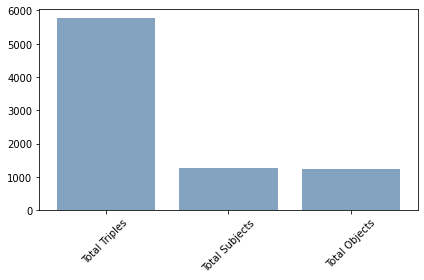

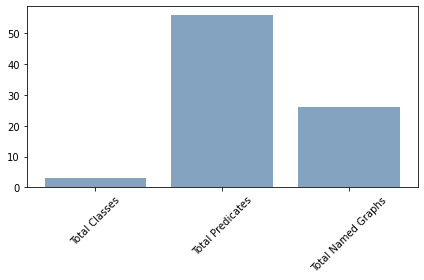

  (2) Charts



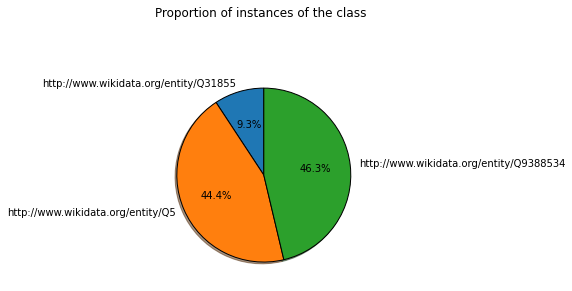

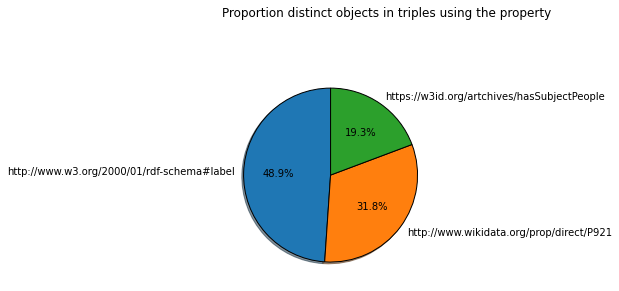

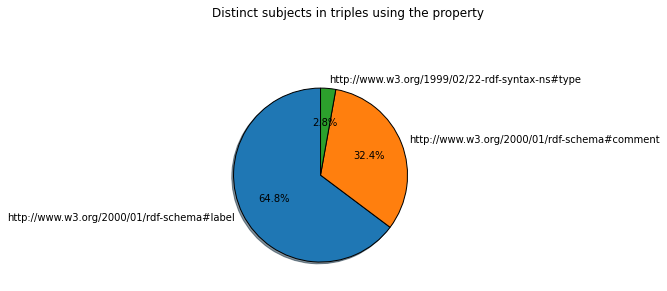

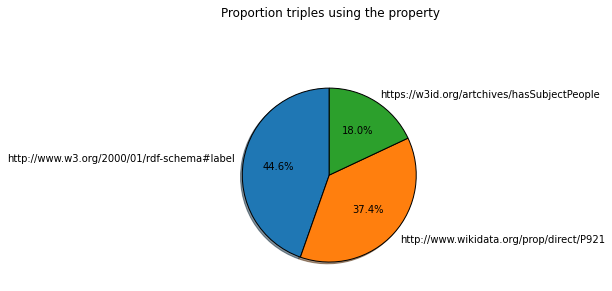




  (3) Full list (up to 100 results)

Full list Classes
1. http://www.wikidata.org/entity/Q9388534
2. http://www.wikidata.org/entity/Q5
3. http://www.wikidata.org/entity/Q31855

Full list Predicates
1. http://www.w3.org/2000/01/rdf-schema#label
2. http://www.wikidata.org/prop/direct/P921
3. http://www.w3.org/2000/01/rdf-schema#comment
4. https://w3id.org/artchives/hasMainObjectType
5. https://w3id.org/artchives/hasAcquisitionType
6. http://www.wikidata.org/prop/direct/P800
7. https://w3id.org/artchives/hasSubjectPeople
8. http://www.wikidata.org/prop/direct/P571
9. https://w3id.org/artchives/hasSubjectArtwork
10. https://w3id.org/artchives/hasNotesOnFindingAid
11. https://w3id.org/artchives/hasScopeAndContentSubject
12. https://w3id.org/artchives/hasAggregator
13. http://www.wikidata.org/prop/direct/P106
14. https://w3id.org/artchives/hasSubjectGenre
15. http://www.wikidata.org/prop/direct/P973
16. http://www.wikidata.org/prop/direct/P27
17. https://w3id.org/artchives/hasNotesOnSyste

In [ ]:
NQSolver()

## Example: ARTchive/ Bufalini's notebook

Please type in the url where your Named Graph is stored at:
https://github.com/marilenadaquino/bufalinis-notebook/raw/master/data/rdf_dump/all.nq

                      [Summary of your Named Graph]

  (1)Total counts

  Your data includes:
  773 triples,
  163 Named Graphs,
  6 distinct classes,
  232 distinct subjects,
  20 distinct predicates, and
  304 distinct objects.



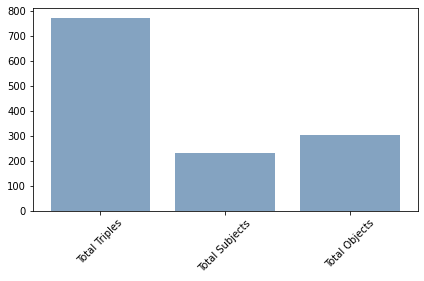

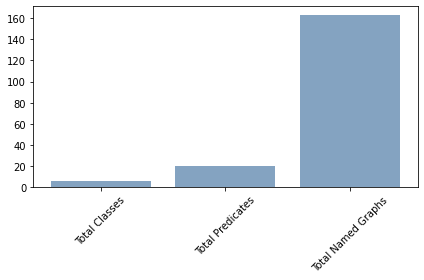

  (2) Charts



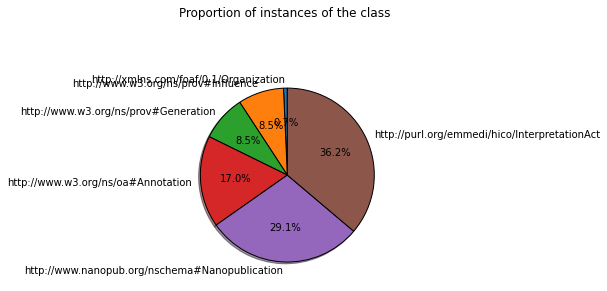

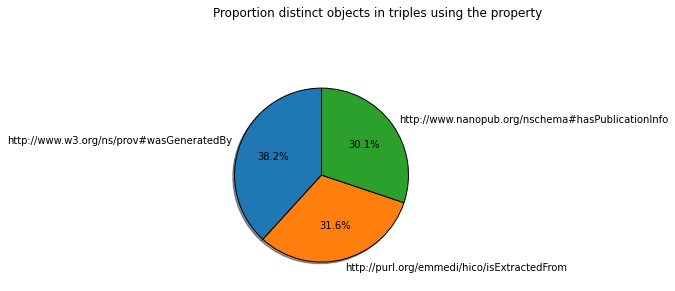

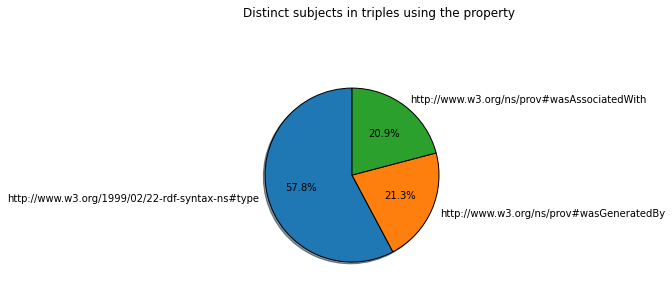

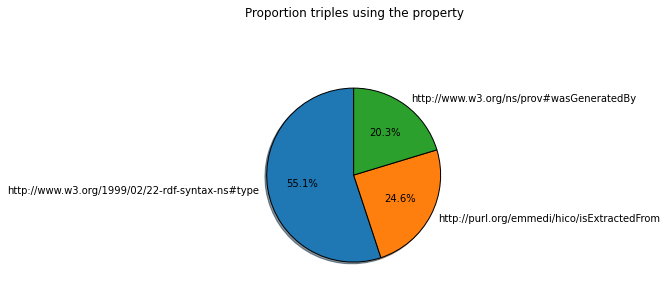




  (3) Full list (up to 100 results)

Full list Classes
1. http://www.nanopub.org/nschema#Nanopublication
2. http://www.w3.org/ns/oa#Annotation
3. http://purl.org/emmedi/hico/InterpretationAct
4. http://www.w3.org/ns/prov#Generation
5. http://www.w3.org/ns/prov#Influence
6. http://xmlns.com/foaf/0.1/Organization

Full list Predicates
1. http://purl.org/emmedi/hico/isExtractedFrom
2. http://www.w3.org/ns/prov#wasGeneratedBy
3. http://purl.org/spar/cito/citesAsRelated
4. http://www.w3.org/2000/01/rdf-schema#label
5. http://purl.org/emmedi/hico/hasInterpretationType
6. http://www.w3.org/1999/02/22-rdf-syntax-ns#type
7. http://www.nanopub.org/nschema#hasPublicationInfo
8. http://www.w3.org/ns/prov#wasAttributedTo
9. http://www.w3.org/ns/prov#wasAssociatedWith
10. http://www.w3.org/ns/prov#generatedAtTime
11. http://www.w3.org/ns/prov#qualifiedInfluence
12. http://purl.org/spar/cito/citesAsAuthority
13. http://purl.org/emmedi/hico/hasInterpretationCriterion
14. http://www.nanopub.org/nsch

In [ ]:
ARTchive= "https://github.com/soobae0707/Visualize_Named_Graph/raw/main/artchives.nq"
Bufalini= "https://github.com/marilenadaquino/bufalinis-notebook/raw/master/data/rdf_dump/all.nq"
NQSolver()